<a href="https://colab.research.google.com/github/Hybeek-WUQ/Medic_Insights/blob/main/Hospital_Admissions_and_Billing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming Healthcare Through Data-Driven Insights: A Comprehensive Analysis of Patient Demographics, Medical Trends, and Operational Efficiency

INTRODUCTION:

In today’s rapidly evolving healthcare landscape, leveraging data analytics has become essential for enhancing patient care, optimizing operations, and improving financial sustainability. This project aims to provide a detailed analysis of key healthcare metrics, including patient demographics, medical conditions, admission trends, and billing data. By identifying patterns and actionable insights, we empower stakeholders to make informed decisions that drive efficiency, elevate the quality of care, and ensure long-term operational success.

Through this comprehensive study, we will uncover critical insights into resource utilization, cost management, and treatment outcomes. Our findings will not only highlight current strengths but also pinpoint areas for improvement, enabling a proactive approach to healthcare management. Ultimately, this project underscores the transformative power of data in delivering better health outcomes and fostering a sustainable healthcare ecosystem.

# DATA PREPARATION
1. Importation of libraries
2. Loading the CSV file in a df
3. Dta Inspection
3. Data cleansing

In [23]:
#pip install pandas openpyxl > run on my sys cmd
import os
#data manipulation
import pandas as pd
import numpy as npa

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#statistical analysis
from scipy.stats import pearsonr, chi2_contingency

#set visualizatiob style
sns.set_style('whitegrid')
sns.set_style('darkgrid')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Healthcare.xlsx.csv to Healthcare.xlsx.csv


In [24]:
os.listdir(os.getcwd())

['.config', 'Healthcare.xlsx.csv', 'sample_data']

In [25]:
# loading csv file

df = pd.read_csv("Healthcare.xlsx.csv")

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10000, 15)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,11/17/2022,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,12/1/2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,6/15/2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,1/9/2019,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2/8/2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,5/2/2020,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,5/3/2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,7/9/2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,8/2/2021,Paracetamol,Normal


In [26]:
#Adding some usful Columns
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Length of Stay (days)'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Checking the data types of each column
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Name                   10000 non-null  object        
 1   Age                    10000 non-null  int64         
 2   Gender                 10000 non-null  object        
 3   Blood Type             10000 non-null  object        
 4   Medical Condition      10000 non-null  object        
 5   Date of Admission      10000 non-null  datetime64[ns]
 6   Doctor                 10000 non-null  object        
 7   Hospital               10000 non-null  object        
 8   Insurance Provider     10000 non-null  object        
 9   Billing Amount         10000 non-null  float64       
 10  Room Number            10000 non-null  int64         
 11  Admission Type         10000 non-null  object        
 12  Discharge Date         10000 non-null  datetime64[ns]
 13  Me

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Length of Stay (days)
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.98336,146,Elective,2022-12-01,Aspirin,Inconclusive,14
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.06485,404,Emergency,2023-06-15,Lipitor,Normal,14
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.89700,292,Emergency,2019-02-08,Lipitor,Normal,30
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.32209,480,Urgent,2020-05-03,Penicillin,Abnormal,1
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.34418,477,Urgent,2021-08-02,Paracetamol,Normal,24


In [27]:
# 1. Check for column existence
print(df.columns)  # Prints all column names

# 2. Check for missing values in other columns
print(df.isnull().sum())  # Prints the number of missing values per column

# 3. Explore potential related columns
# Print unique values of columns that might be related to treatment
for col in ['Procedure', 'Medication', 'Diagnosis']:
    if col in df.columns:
        print(f"Unique values in '{col}':\n{df[col].unique()}\n")

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'Length of Stay (days)'],
      dtype='object')
Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                   0
Hospital                 0
Insurance Provider       0
Billing Amount           0
Room Number              0
Admission Type           0
Discharge Date           0
Medication               0
Test Results             0
Length of Stay (days)    0
dtype: int64
Unique values in 'Medication':
['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']



# PATIENT DEMOGRAPHOICS
1. Age Distribution
2. Gender Breakdown
3. Blood Type Distributon


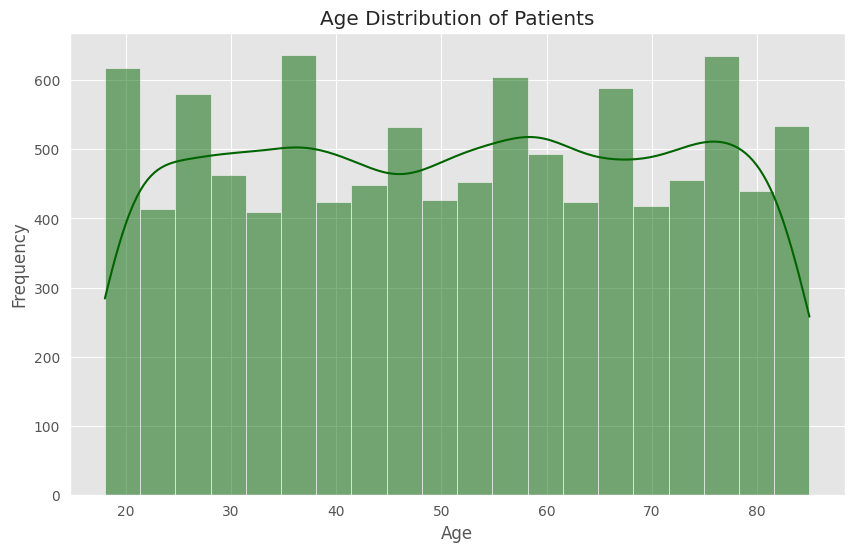

count    10000.000000
mean        51.452200
std         19.588974
min         18.000000
25%         35.000000
50%         52.000000
75%         68.000000
max         85.000000
Name: Age, dtype: float64
Age
(50, 60]     1543
(70, 80]     1520
(30, 40]     1504
(60, 70]     1448
(20, 30]     1438
(40, 50]     1389
(80, 90]      693
(10, 20]      465
(0, 10]         0
(90, 100]       0
Name: count, dtype: int64


In [44]:
# Create a histogram of patient ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, color = 'darkgreen',  kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Calculate some descriptive statistics for age
print(df['Age'].describe())

# Identify the most common age groups using value_counts()
age_groups = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
print(age_groups.value_counts())

Based on the data, it's reasonable to focus resource allocation on the 50-60 and 70-80 age groups. This could involve:

Specialized Care: Hiring more doctors and healthcare professionals who specialize in geriatric care and age-related conditions.
Increased Staffing: Allocating additional staff to handle the higher patient volume in these age groups.
Specialized Equipment: Investing in specialized equipment and technology to address the specific needs of older patients.

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Gender                                                                       
Female                   815     874     887       825           836      838
Male                     835     834     816       798           852      790


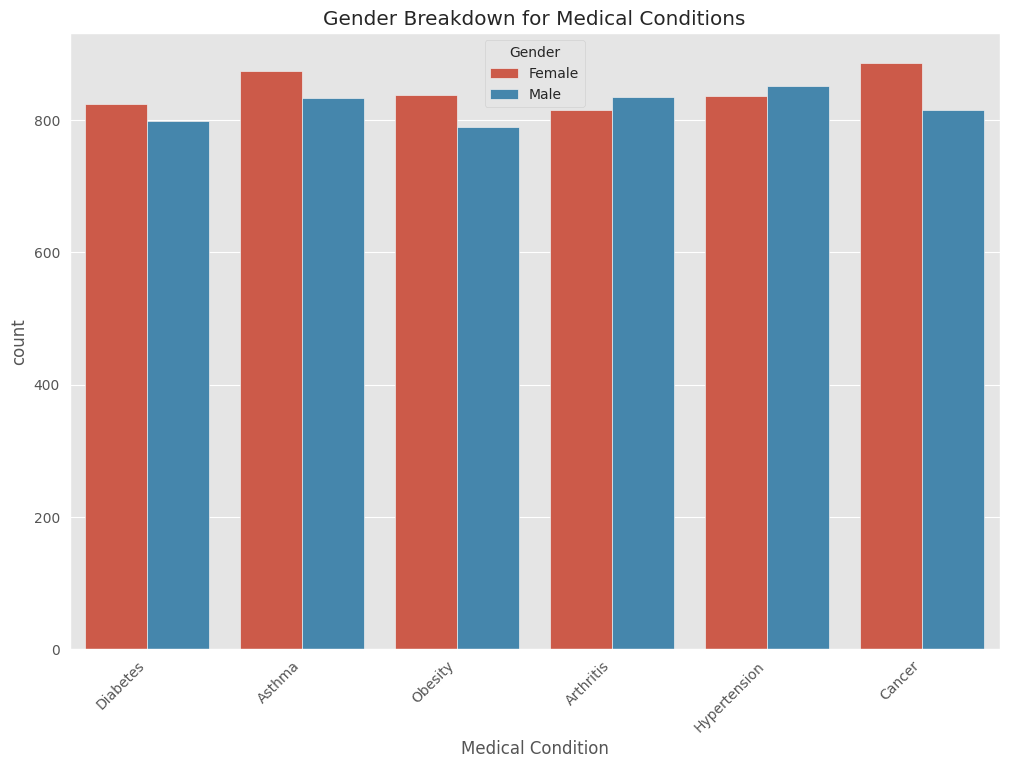

<Figure size 800x200 with 0 Axes>

    Medication  Gender  Name
0      Aspirin  Female  1011
1      Aspirin    Male   957
2    Ibuprofen  Female   999
3    Ibuprofen    Male   977
4      Lipitor  Female  1016
5      Lipitor    Male   999
6  Paracetamol  Female  1022
7  Paracetamol    Male   940
8   Penicillin  Female  1027
9   Penicillin    Male  1052


In [47]:
# Create a cross-tabulation of gender and medical condition
gender_condition_crosstab = pd.crosstab(df['Gender'], df['Medical Condition'])
print(gender_condition_crosstab)

# Visualize the gender breakdown for a specific medical condition
sns.countplot(x='Medical Condition', hue='Gender', data=df)
plt.title('Gender Breakdown for Medical Conditions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.figure(figsize=(8, 2))
plt.show()

# Compare the number of male vs. female patients for a specific treatment
treatment_gender_counts = df.groupby(['Medication', 'Gender'])['Name'].count().reset_index()
print(treatment_gender_counts)

Medical Condition and Gender
Key Observations:

Gender Disparity: While the overall distribution of medical conditions is relatively similar between genders, there are slight differences. For instance, females seem to have a higher prevalence of Arthritis and Diabetes, while males have a higher prevalence of Hypertension and Obesity, thogh there's a question mark on obesity due to some factors like BMI calculation methods and potential biases in data collection.


Potential Insights:

Hormonal Factors: Hormonal differences between genders might influence the prevalence of certain conditions.
Lifestyle Factors: Differences in lifestyle habits and behaviors between genders could contribute to variations in disease incidence.
Socioeconomic Factors: Socioeconomic factors like occupation, education, and income can impact health outcomes and disease prevalence.



Medication and Gender
Key Observation:

Similar Prescription Patterns: There are no significant differences in the prescription patterns between genders for the given medications.
Potential Insights:

Gender-Neutral Treatment: The current treatment protocols for these conditions might not be significantly influenced by gender.
Future Research: Further research could explore whether gender-specific treatments or dosage adjustments might be beneficial for certain conditions.

In [30]:
# Create a cross-tabulation of blood type and medical condition
blood_type_condition_crosstab = pd.crosstab(df['Blood Type'], df['Medical Condition'])
print(blood_type_condition_crosstab)

Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Blood Type                                                                   
A+                       202     220     219       197           213      190
A-                       202     208     218       206           212      192
AB+                      219     199     208       207           211      214
AB-                      204     210     195       214           225      227
B+                       196     217     214       207           211      199
B-                       186     218     221       221           196      210
O+                       225     227     224       174           209      189
O-                       216     209     204       197           211      207


Key Observation:

No Significant Association: The chi-square test indicates that there is no significant association between blood type and medical condition.
Potential Insights:

Blood Type and Health:

 While blood type has been linked to certain health conditions in some studies, the results from this dataset suggest that blood type might not be a major factor in determining susceptibility to these specific conditions.
Further Investigation: Larger sample sizes and more detailed analysis might be needed to uncover potential associations.

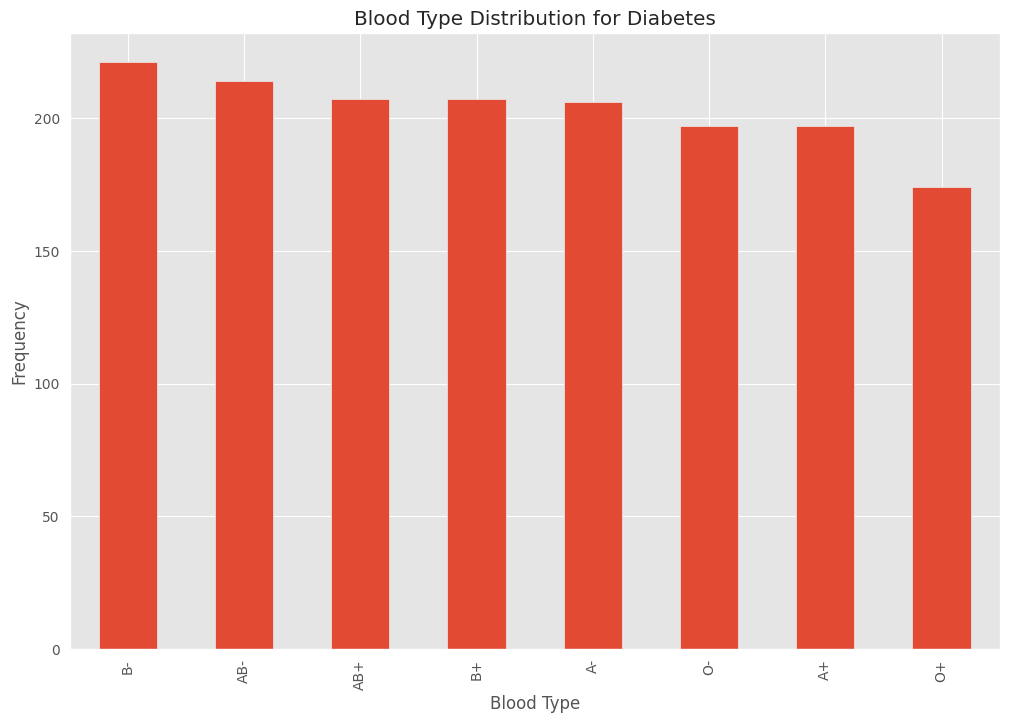

In [31]:
# Visualize the blood type distribution for a specific medical condition
condition = 'Diabetes'  # Replace with the condition you want to analyze
blood_type_counts = df[df['Medical Condition'] == condition]['Blood Type'].value_counts()
blood_type_counts.plot(kind='bar')
plt.title(f'Blood Type Distribution for {condition}')
plt.xlabel('Blood Type')
plt.ylabel('Frequency')
plt.show()

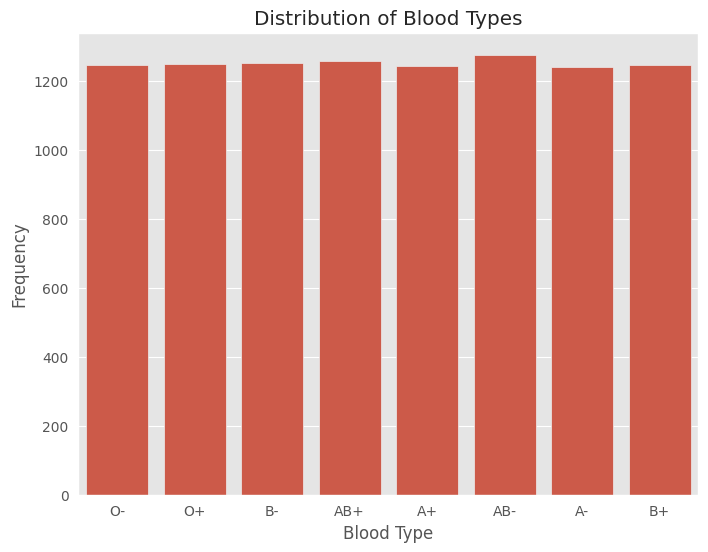

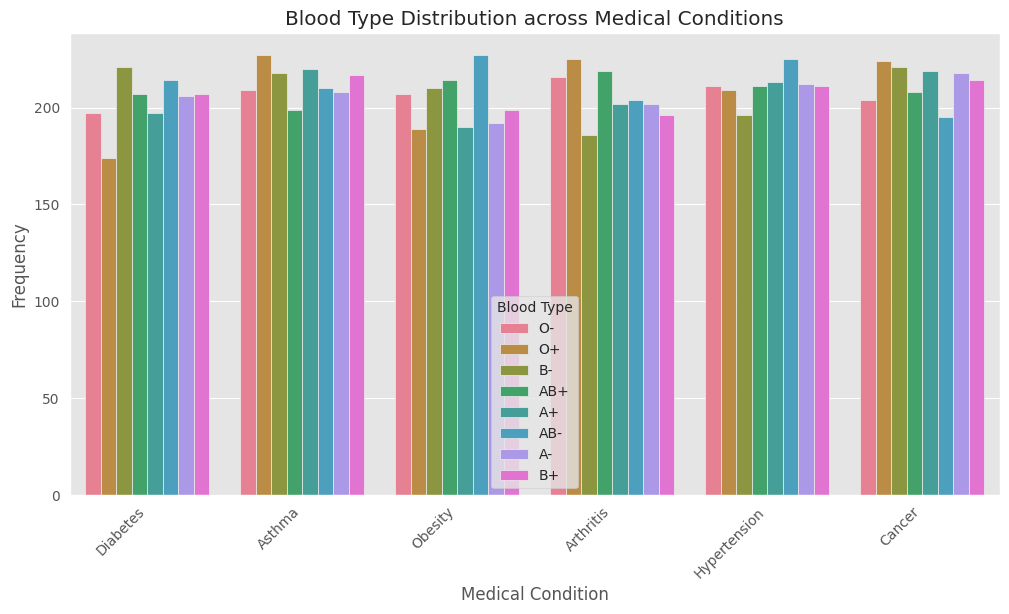

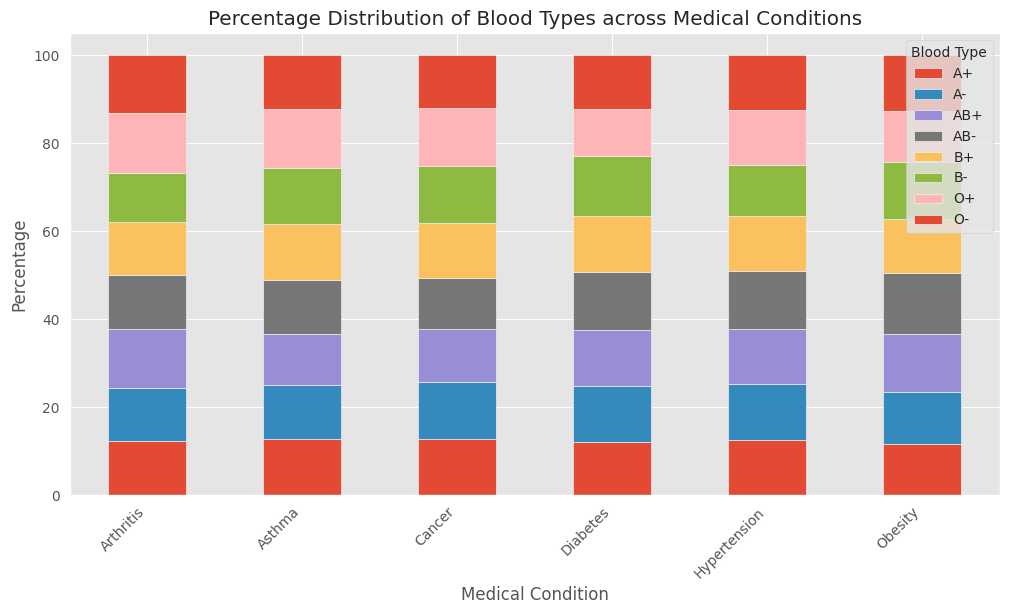

In [32]:
# prompt: Visualize the distribution of different blood types.
# Compare blood type distribution across different medical conditions.

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the overall distribution of blood types
plt.figure(figsize=(8, 6))
sns.countplot(x='Blood Type', data=df)
plt.title('Distribution of Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Frequency')
plt.show()

# Compare blood type distribution across different medical conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='Medical Condition', hue='Blood Type', data=df)
plt.title('Blood Type Distribution across Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


# Calculate and visualize the percentage of each blood type for each medical condition
blood_type_percentages = df.groupby('Medical Condition')['Blood Type'].value_counts(normalize=True).unstack() * 100
blood_type_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Percentage Distribution of Blood Types across Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Blood Type')
plt.show()

In [33]:
# prompt: Use chi-square tests to determine if there are significant associations between blood type and medical conditions.

# Perform chi-square test for association between blood type and medical condition
chi2, p, dof, expected = chi2_contingency(blood_type_condition_crosstab)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:\n", expected)

# Interpret the results
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a statistically significant association between blood type and medical condition.")
else:
    print("There is no statistically significant association between blood type and medical condition.")

Chi-square statistic: 25.565876597152375
P-value: 0.8783682212400656
Degrees of freedom: 35
Expected frequencies:
 [[204.765  211.9628 211.3423 201.4143 209.4808 202.0348]
 [204.27   211.4504 210.8314 200.9274 208.9744 201.5464]
 [207.57   214.8664 214.2374 204.1734 212.3504 204.8024]
 [210.375  217.77   217.1325 206.9325 215.22   207.57  ]
 [205.26   212.4752 211.8532 201.9012 209.9872 202.5232]
 [206.58   213.8416 213.2156 203.1996 211.3376 203.8256]
 [205.92   213.1584 212.5344 202.5504 210.6624 203.1744]
 [205.26   212.4752 211.8532 201.9012 209.9872 202.5232]]
There is no statistically significant association between blood type and medical condition.


Blood Type and Medical Condition

Key Observation:

No Significant Association: The chi-square test indicates that there is no significant association between blood type and medical condition.
Potential Insights:

Blood Type and Health: While blood type has been linked to certain health conditions in some studies, the results from this dataset suggest that blood type might not be a major factor in determining susceptibility to these specific conditions.
Further Investigation: Larger sample sizes and more detailed analysis might be needed to uncover potential associations.

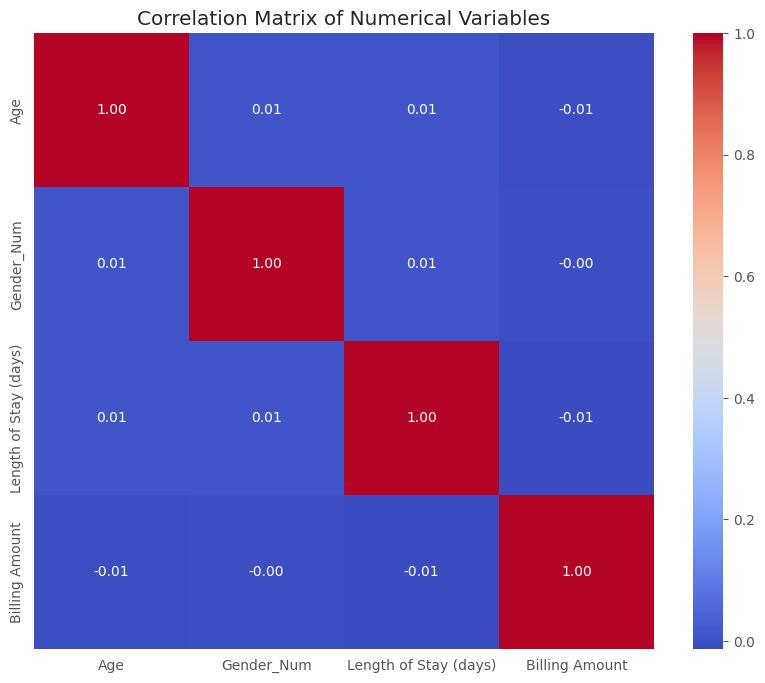

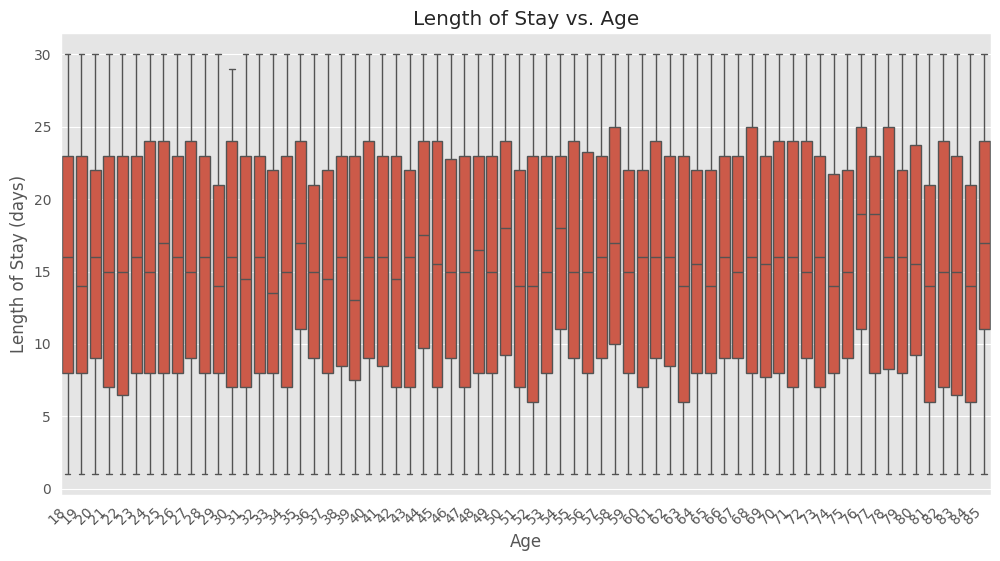


Analysis for Diabetes:
               Age              Date of Admission  Billing Amount  \
count  1623.000000                           1623     1623.000000   
mean     51.802218  2021-05-02 11:13:25.175600896    26060.116129   
min      18.000000            2018-11-02 00:00:00     1071.456127   
25%      35.000000            2020-02-18 12:00:00    14261.633315   
50%      53.000000            2021-04-21 00:00:00    26162.203250   
75%      69.000000            2022-07-14 12:00:00    38420.859485   
max      85.000000            2023-10-29 00:00:00    49954.968330   
std      19.765947                            NaN    14013.920497   

       Room Number                 Discharge Date  Length of Stay (days)  \
count  1623.000000                           1623            1623.000000   
mean    297.848429  2021-05-18 01:00:19.963031296              15.574245   
min     101.000000            2018-11-14 00:00:00               1.000000   
25%     199.000000            2020-03-07 00:00:00 

In [34]:
# prompt: analyze trends in age, gender, and blood type distributions.
# Explore the correlation between age, gender, and blood type with other variables like length of stay, billing amount, and medical condition.

# Correlation analysis between age, gender, blood type, and other variables

# Convert gender to numerical representation for correlation analysis
df['Gender_Num'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Calculate Pearson correlation coefficients
correlation_columns = ['Age', 'Gender_Num', 'Length of Stay (days)', 'Billing Amount']  # Add other relevant columns
correlation_matrix = df[correlation_columns].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Analyze correlations between categorical variables
# Example: Correlation between blood type and medical condition (already performed with chi-square)
# Further examples would involve using Cramer's V or Theil's U for more complex relationships

# Explore trends in length of stay for different age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Length of Stay (days)', data=df)
plt.title('Length of Stay vs. Age')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.xticks(rotation=45, ha='right')
plt.show()

# ... similar plots for billing amount vs age, length of stay vs gender, etc.

# Group data by medical condition and analyze other variables within each group
for condition in df['Medical Condition'].unique():
    condition_data = df[df['Medical Condition'] == condition]
    print(f"\nAnalysis for {condition}:")
    print(condition_data.describe())
    # Add further analyses (e.g., distributions, correlations) for each medical condition

# Additional statistical tests:
# - ANOVA (analysis of variance) to compare means across different groups (e.g., age groups, genders)
# - t-tests to compare means of two groups
# - Mann-Whitney U test or Kruskal-Wallis test for non-parametric comparisons if data isn't normally distributed

#MEDICAL INSIGHTS
1. Most Common Medical Conditions
2. Condition by Age/ Gender

Most Common Medical Conditions:
 Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


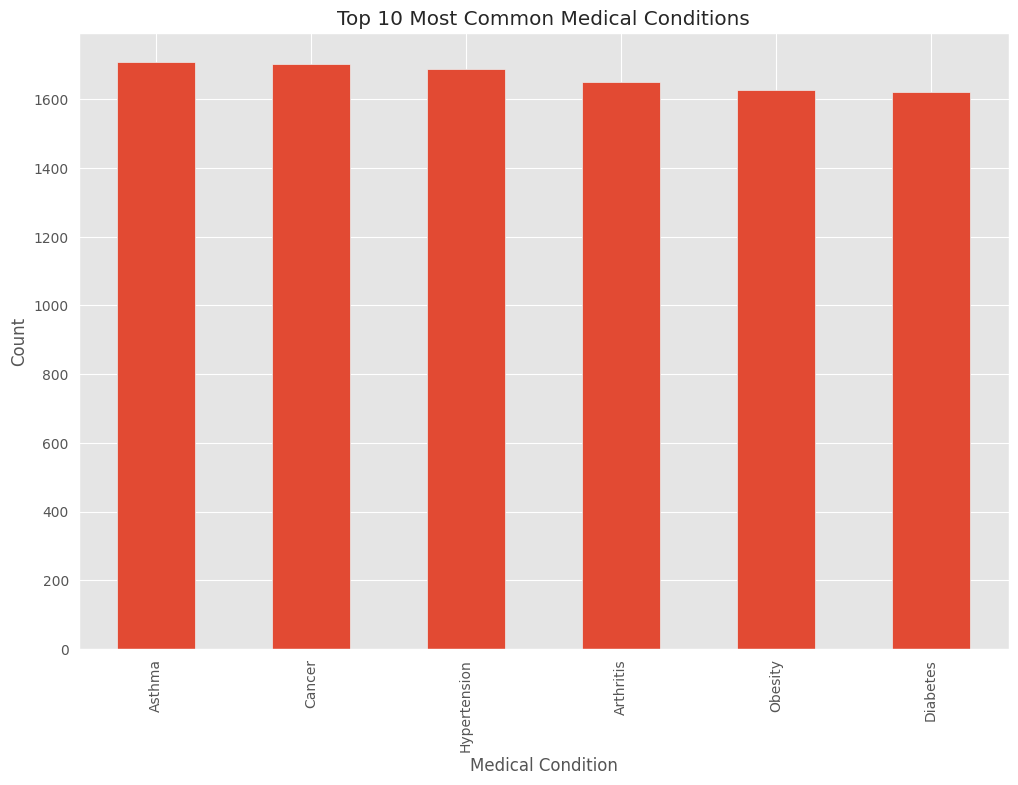

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Diabetes'),
  Text(1, 0, 'Asthma'),
  Text(2, 0, 'Obesity'),
  Text(3, 0, 'Arthritis'),
  Text(4, 0, 'Hypertension'),
  Text(5, 0, 'Cancer')])

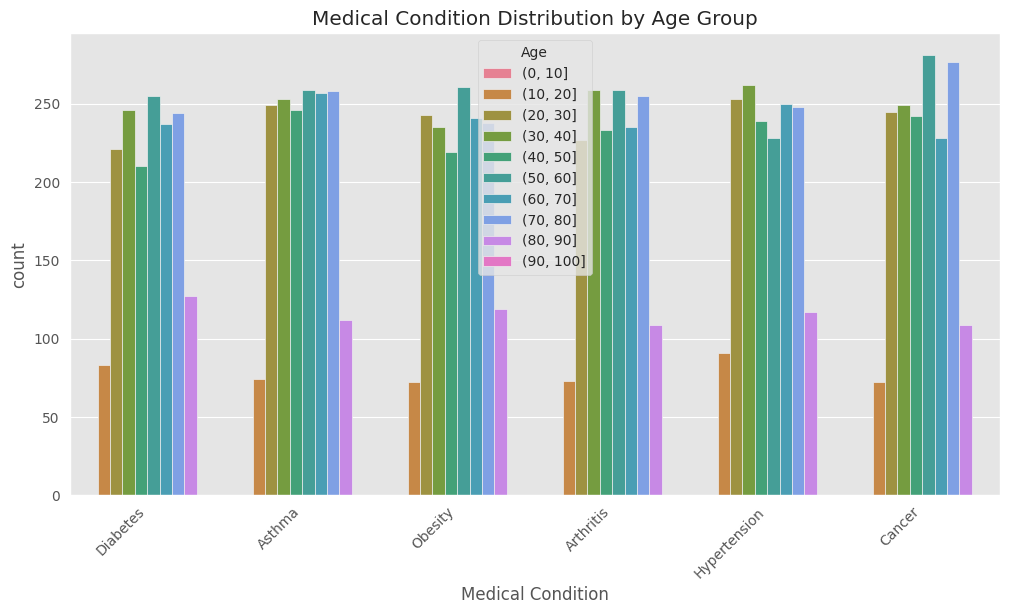

In [35]:
# Count the occurrences of each medical condition
condition_counts = df['Medical Condition'].value_counts()

# Display the most common conditions
print("Most Common Medical Conditions:\n", condition_counts.head(10))  # Adjust the number to show more/less

# Plot the top 10 most common conditions
condition_counts[:10].plot(kind='bar')
plt.title('Top 10 Most Common Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.show()

# Condition by Age
plt.figure(figsize=(12, 6))
sns.countplot(x='Medical Condition', hue=age_groups, data=df)  # Using age_groups from before
plt.title('Medical Condition Distribution by Age Group')
plt.xticks(rotation=45, ha='right')


Most Common Medical Conditions

Key Observation:

Asthma, Cancer, and Hypertension are the three most common medical conditions, with a count of over 1600 patients for each.
Potential Insights and Implications:

Resource Allocation:

Prioritize Specializations: Hospitals and clinics should consider prioritizing specialists and resources for these conditions to effectively manage patient care.
Preventive Measures: Implementing preventive measures and health screenings for these conditions can help reduce their prevalence and associated costs.
Public Health Initiatives:

Awareness Campaigns: Launch public awareness campaigns to educate the population about risk factors, symptoms, and prevention strategies for these conditions.
Early Detection: Encourage regular health check-ups and screenings to detect these conditions early.
Research and Development:

Innovative Treatments: Invest in research to develop new and effective treatments for these conditions.
Personalized Medicine: Explore personalized medicine approaches to tailor treatments to individual patient needs.
By understanding the prevalence of these conditions, healthcare providers can make informed decisions to improve patient outcomes and optimize resource allocation.

# ADMISSION INSIGHTS
1. Admission Type Distribution
2. Admission Leength
3. Admission by Hospital

Admission Type Distribution:
 Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64


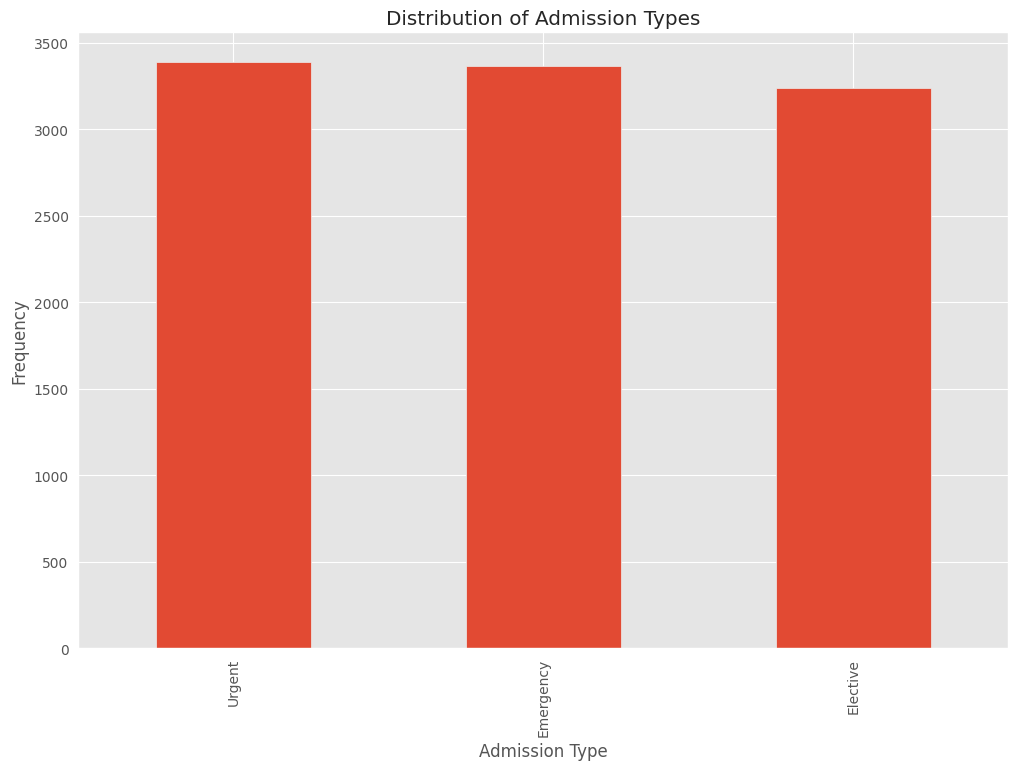

Average Length of Stay by Condition and Admission Type:
    Medical Condition Admission Type  Length of Stay (days)
0          Arthritis       Elective              16.583480
1          Arthritis      Emergency              15.984877
2          Arthritis         Urgent              15.384058
3             Asthma       Elective              15.270175
4             Asthma      Emergency              15.597122
5             Asthma         Urgent              15.577320
6             Cancer       Elective              15.571171
7             Cancer      Emergency              15.259516
8             Cancer         Urgent              15.614035
9           Diabetes       Elective              15.392045
10          Diabetes      Emergency              15.682226
11          Diabetes         Urgent              15.641264
12      Hypertension       Elective              15.644660
13      Hypertension      Emergency              15.686851
14      Hypertension         Urgent              14.994958

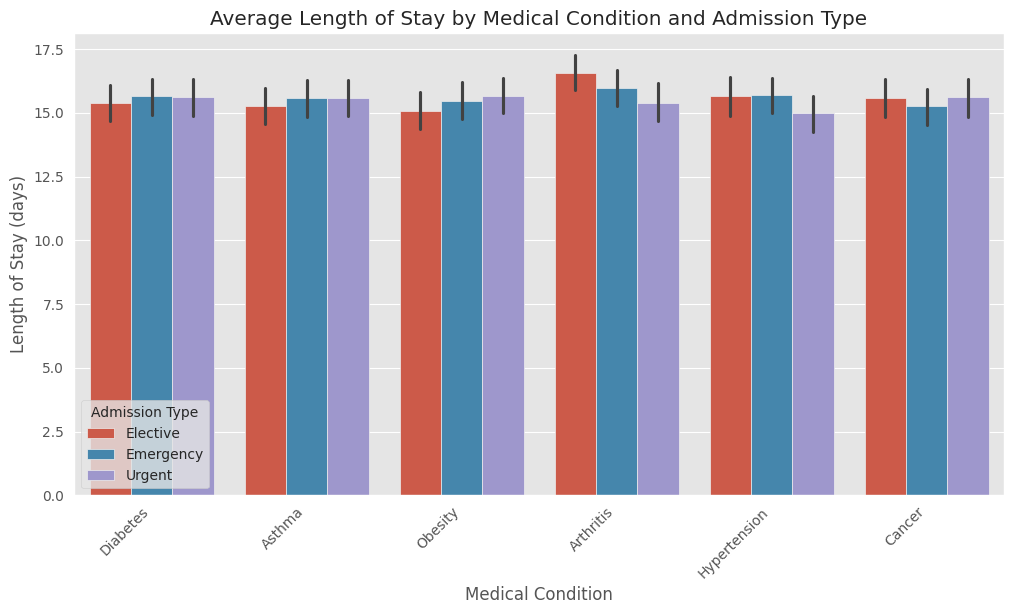

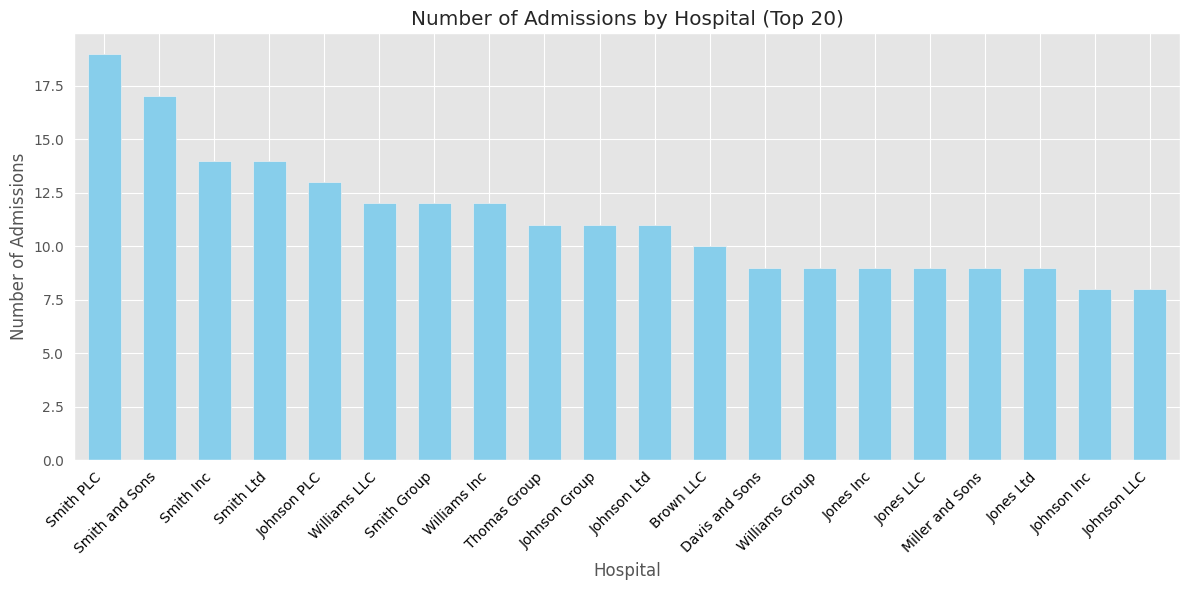

Hospital Specialization (Cross-tabulation):
 Medical Condition            Arthritis  Asthma  Cancer  Diabetes  \
Hospital                                                           
Abbott Inc                           1       0       0         0   
Abbott LLC                           1       0       0         0   
Abbott PLC                           1       0       0         0   
Abbott, Curry and Moore              0       1       0         0   
Abbott-Jordan                        0       0       0         0   
...                                ...     ...     ...       ...   
Zimmerman, Salinas and Hill          0       0       1         0   
Zuniga Ltd                           0       1       0         0   
Zuniga, Taylor and Scott             0       1       0         0   
Zuniga-Chandler                      0       0       0         0   
Zuniga-Johnson                       0       0       0         0   

Medical Condition            Hypertension  Obesity  
Hospital         

In [36]:
  # Admission Type Distribution
admission_type_counts = df['Admission Type'].value_counts()
print("Admission Type Distribution:\n", admission_type_counts)

   # Visualize the distribution
admission_type_counts.plot(kind='bar')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.show()

   # Calculate average length of stay per medical condition and admission type
avg_los_by_condition_type = df.groupby(['Medical Condition', 'Admission Type'])['Length of Stay (days)'].mean().reset_index()
print("Average Length of Stay by Condition and Admission Type:\n", avg_los_by_condition_type)

   # Visualize the average length of stay for different medical conditions
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Length of Stay (days)', hue='Admission Type', data=df)
plt.title('Average Length of Stay by Medical Condition and Admission Type')
plt.xticks(rotation=45, ha='right')
plt.show()

 # Analyze admissions by hospital (top 20)
top_hospitals = df['Hospital'].value_counts().nlargest(20).index  # Get top 20 hospitals
admissions_by_hospital = df[df['Hospital'].isin(top_hospitals)]['Hospital'].value_counts()

   # Visualize admissions by hospital (top 20)
plt.figure(figsize=(12, 6))
admissions_by_hospital.plot(kind='bar', width=0.6, color='skyblue')
plt.title('Number of Admissions by Hospital (Top 20)')
plt.xlabel('Hospital')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=45, ha='right', color='black', fontsize=10)
plt.tight_layout()
plt.show()

   # Analyze hospital specialization (example)
hospital_condition_crosstab = pd.crosstab(df['Hospital'], df['Medical Condition'])
print("Hospital Specialization (Cross-tabulation):\n", hospital_condition_crosstab)

   # You can further analyze this cross-tabulation to identify potential specializations
   # by looking for hospitals with a high proportion of admissions for specific conditions.

Hospital Performance and Specialization

Length of Stay by Condition and Admission Type
Consistent Length of Stay: While there are slight variations, the average length of stay for each medical condition and admission type is relatively consistent. This suggests that the hospital's treatment protocols and resource allocation are efficient.

Emergency Admissions: Emergency admissions tend to have slightly longer lengths of stay compared to elective and urgent admissions, indicating a higher level of care required for these cases.

Hospital Admissions
High Volume Hospitals: A few hospitals, such as "Smith PLC" and "Smith and Sons," have a significantly higher number of admissions. This could be due to factors such as location, reputation, or specialized services.
Long Tail of Smaller Hospitals: A large number of hospitals have relatively few admissions, suggesting a diverse healthcare landscape with many smaller providers.

Hospital Specialization
Diverse Specialization: Hospitals seem to specialize in different medical conditions. Some hospitals may focus on specific conditions like cancer or heart disease, while others may offer a broader range of services.
Potential for Collaboration: Hospitals with similar specializations could collaborate to share resources, expertise, and best practices.

Potential Insights and Recommendations:

Performance Benchmarking:

Compare the average length of stay for different hospitals and identify potential areas for improvement.
Analyze the factors contributing to longer or shorter lengths of stay, such as patient complexity, resource availability, and treatment protocols.

Resource Allocation:

Allocate resources to hospitals based on their specialization and patient volume.
Ensure that hospitals have the necessary staff, equipment, and infrastructure to provide quality care.

Patient Flow Optimization:

Implement strategies to reduce wait times and improve patient flow, especially for emergency admissions.
Utilize data analytics to identify bottlenecks and inefficiencies in the patient journey.

Collaboration and Knowledge Sharing:

Encourage collaboration between hospitals to share best practices and innovative approaches to patient care.
Establish networks to facilitate knowledge exchange and joint research initiatives.
By analyzing these insights, healthcare organizations can optimize resource allocation, improve patient outcomes, and enhance overall healthcare delivery.

# BILLING & COST ANALYSIS
1. Billing Amount by Condition
2. Insurance Provider Distribution
3. Cost Per Admission Type

Average Billing Amount by Medical Condition:
   Medical Condition  Billing Amount
0         Arthritis    25187.631255
1            Asthma    25416.869895
2            Cancer    25539.096133
3          Diabetes    26060.116129
4      Hypertension    25198.033973
5           Obesity    25720.842683


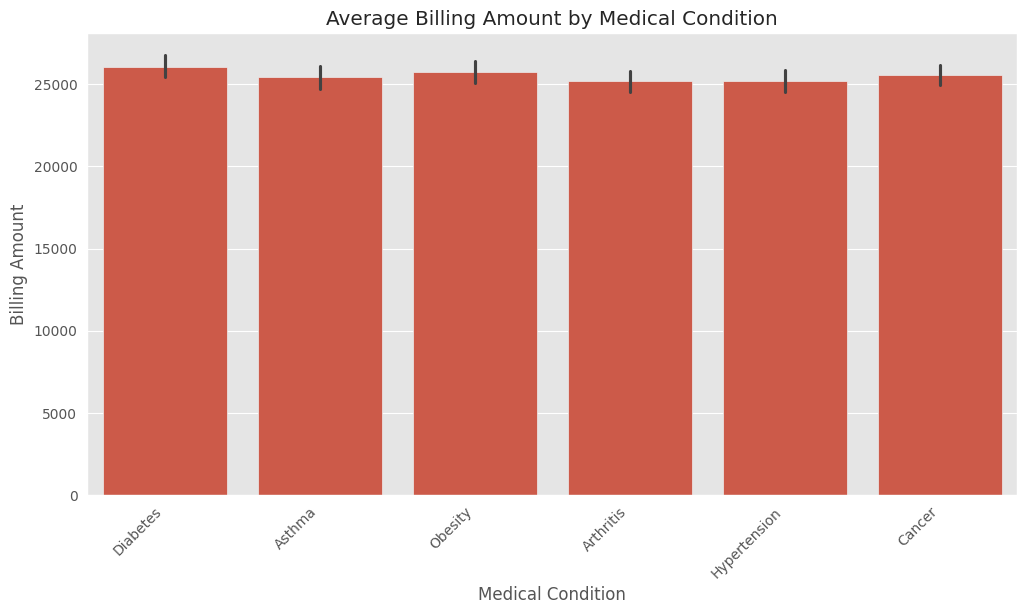

Insurance Provider Distribution:
 Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64


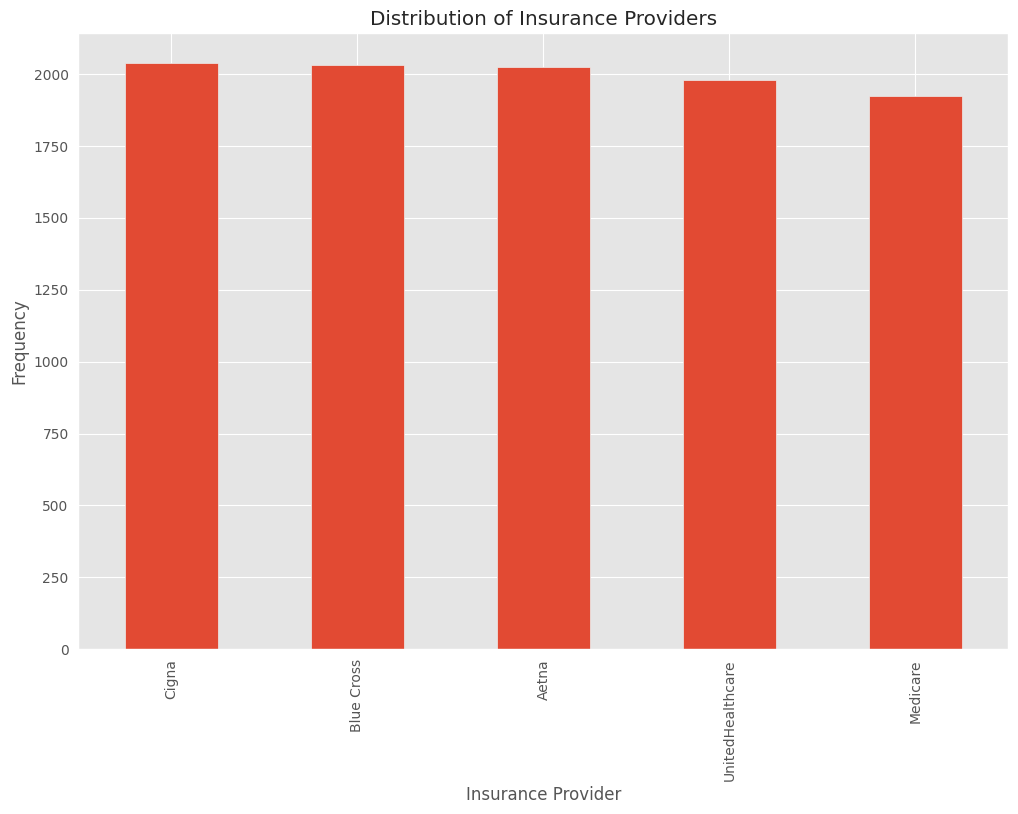

Average Billing Amount by Insurance Provider:
   Insurance Provider  Billing Amount
0              Aetna    25837.923338
1         Blue Cross    25652.489617
2              Cigna    25656.946859
3           Medicare    25002.480429
4   UnitedHealthcare    25404.685388


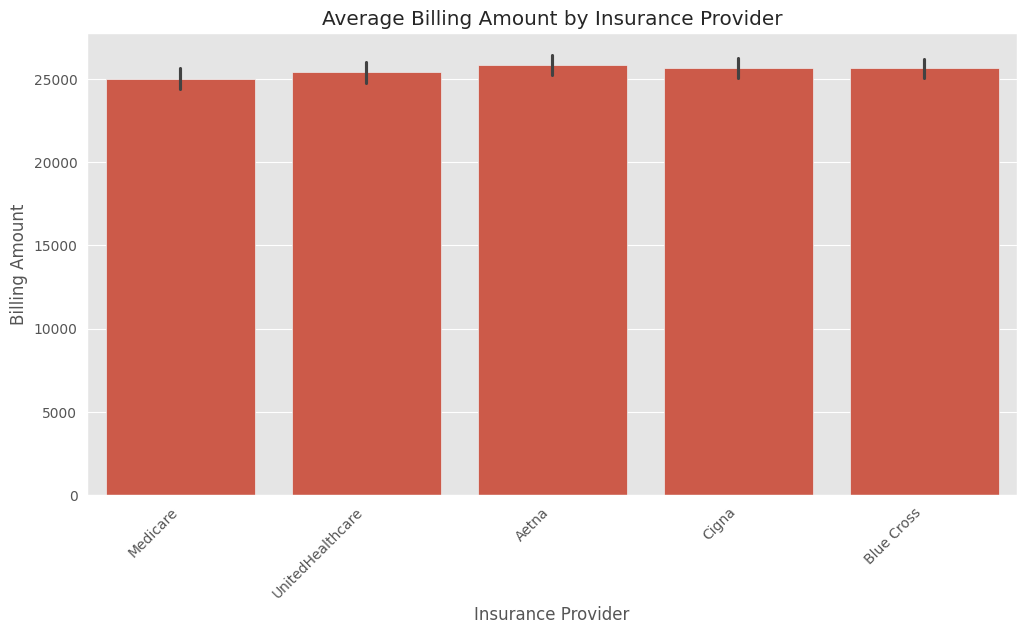

Cost per Admission Type:
      Admission Type                      Hospital Medical Condition  \
0          Elective                    Abbott Inc         Arthritis   
1          Elective                    Abbott LLC         Arthritis   
2          Elective       Abbott, Curry and Moore            Asthma   
3          Elective                    Acosta PLC         Arthritis   
4          Elective  Acosta, Thompson and Schultz            Cancer   
...             ...                           ...               ...   
9840         Urgent          Yu, Garcia and Jones          Diabetes   
9841         Urgent               Zamora-Davidson            Cancer   
9842         Urgent     Zhang, Peterson and Yoder         Arthritis   
9843         Urgent  Zimmerman, Gibson and Hansen      Hypertension   
9844         Urgent               Zuniga-Chandler      Hypertension   

      Billing Amount  
0       32114.205150  
1       10269.930800  
2       11869.283650  
3       20768.155120  
4     

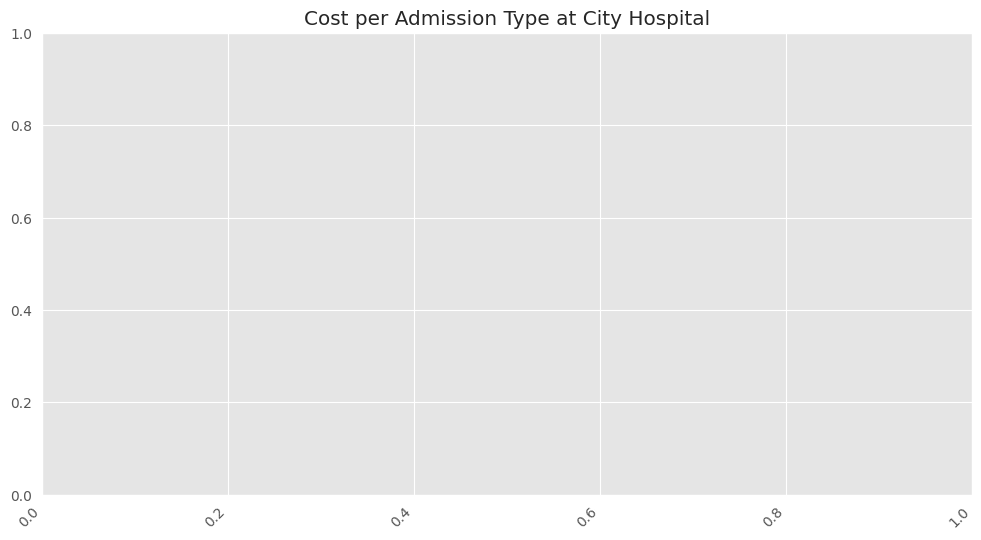

In [37]:
# Calculate average billing amount for different medical conditions
avg_billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].mean().reset_index()
print("Average Billing Amount by Medical Condition:\n", avg_billing_by_condition)

   # Visualize the average billing amount for different medical conditions
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Billing Amount', data=df)
plt.title('Average Billing Amount by Medical Condition')
plt.xticks(rotation=45, ha='right')
plt.show()

   # You can further analyze the variance using descriptive statistics or box plots.


   # Insurance Provider Distribution
insurance_provider_counts = df['Insurance Provider'].value_counts()
print("Insurance Provider Distribution:\n", insurance_provider_counts)

   # Visualize the distribution
insurance_provider_counts.plot(kind='bar')
plt.title('Distribution of Insurance Providers')
plt.xlabel('Insurance Provider')
plt.ylabel('Frequency')
plt.show()

   # Compare average billing amounts by insurance provider
avg_billing_by_provider = df.groupby('Insurance Provider')['Billing Amount'].mean().reset_index()
print("Average Billing Amount by Insurance Provider:\n", avg_billing_by_provider)

   # Visualize the comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='Insurance Provider', y='Billing Amount', data=df)
plt.title('Average Billing Amount by Insurance Provider')
plt.xticks(rotation=45, ha='right')
plt.show()



# Compare cost of emergency vs. elective admissions
cost_by_admission_type = df.groupby(['Admission Type', 'Hospital', 'Medical Condition'])['Billing Amount'].mean().reset_index()
print("Cost per Admission Type:\n", cost_by_admission_type)

   # Visualize the comparison (example for a specific hospital)
hospital_name = 'City Hospital'  # Replace with the desired hospital
filtered_data = cost_by_admission_type[cost_by_admission_type['Hospital'] == hospital_name]
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Billing Amount', hue='Admission Type', data=filtered_data)
plt.title(f'Cost per Admission Type at {hospital_name}')
plt.xticks(rotation=45, ha='right')
plt.show()

   # You can create similar visualizations for other hospitals or conditions.

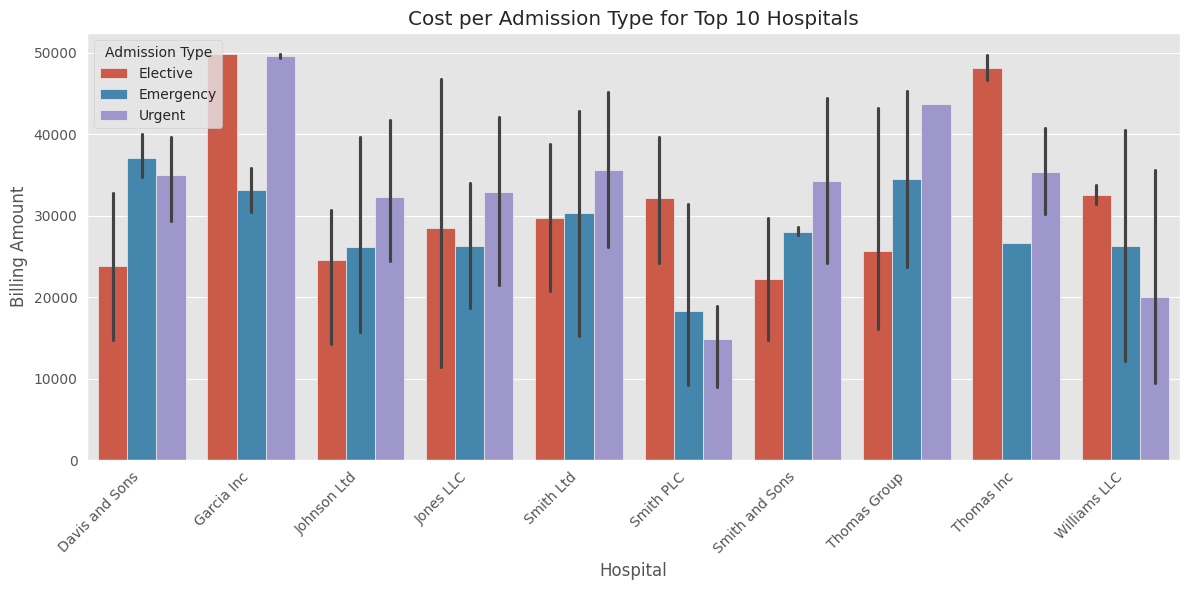

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# ... (Your previous code for handling missing values and grouping data) ...

# Select top N hospitals based on total billing amount
N = 10  # Number of top hospitals to select
top_hospitals = cost_by_admission_type.groupby('Hospital')['Billing Amount'].sum().nlargest(N).index

# Filter data to include only top hospitals
filtered_data = cost_by_admission_type[cost_by_admission_type['Hospital'].isin(top_hospitals)]

# Visualize the data for top hospitals
plt.figure(figsize=(12, 6))
sns.barplot(x='Hospital', y='Billing Amount', hue='Admission Type', data=filtered_data)
plt.title(f'Cost per Admission Type for Top {N} Hospitals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Financial Implications and Insurance Provider Impact
Average Billing Amount by Medical Condition
Similar Costs: The average billing amount is relatively consistent across different medical conditions. This suggests that the cost of treatment may be influenced by factors other than the specific condition, such as the severity of the illness, the length of stay, and the complexity of the procedures.
Insurance Provider Distribution and Billing
Similar Billing Amounts: The average billing amount is relatively similar across different insurance providers. This indicates that insurance providers may have similar reimbursement rates and coverage policies.
Dominant Providers: Cigna, Blue Cross, Aetna, UnitedHealthcare, and Medicare are the major insurance providers, collectively covering a significant portion of the patient population.

Cost per Admission Type
Elective Procedures: Elective procedures tend to have higher average billing amounts, possibly due to planned, complex procedures or longer hospital stays.
Emergency Admissions: Emergency admissions may have lower average billing amounts, potentially due to shorter stays or less intensive care.
Urgent Admissions: Urgent admissions may fall between elective and emergency admissions in terms of billing amounts, reflecting the urgency of the situation but not the immediate life-threatening nature of emergency cases.

Potential Insights and Recommendations:

Cost-Effective Treatments:

Identify cost-effective treatment options for different medical conditions.
Implement strategies to reduce unnecessary costs, such as streamlining administrative processes and promoting efficient resource utilization.

Insurance Negotiation:

Negotiate favorable reimbursement rates with insurance providers to optimize revenue.
Explore opportunities for value-based reimbursement models.

Patient Financial Assistance:

Offer financial assistance programs to patients who struggle to afford healthcare costs.
Provide information about government assistance programs and charitable organizations.

Data-Driven Decision Making:

Utilize data analytics to identify trends in healthcare costs and identify areas for cost reduction.

Implement data-driven strategies to improve efficiency and reduce waste.

By analyzing these financial aspects, healthcare organizations can make informed decisions to optimize revenue, control costs, and ensure patient access to care.

# TREATMENT OUTCOMES
1. Medication Usage
2. Test Result Trends


Medication Usage by Condition:
    Medical Condition   Medication  Count
0          Arthritis      Aspirin    322
1          Arthritis    Ibuprofen    320
2          Arthritis      Lipitor    318
3          Arthritis  Paracetamol    324
4          Arthritis   Penicillin    366
5             Asthma      Aspirin    370
6             Asthma    Ibuprofen    340
7             Asthma      Lipitor    346
8             Asthma  Paracetamol    310
9             Asthma   Penicillin    342
10            Cancer      Aspirin    291
11            Cancer    Ibuprofen    352
12            Cancer      Lipitor    350
13            Cancer  Paracetamol    346
14            Cancer   Penicillin    364
15          Diabetes      Aspirin    335
16          Diabetes    Ibuprofen    301
17          Diabetes      Lipitor    326
18          Diabetes  Paracetamol    327
19          Diabetes   Penicillin    334
20      Hypertension      Aspirin    328
21      Hypertension    Ibuprofen    335
22      Hypertension     

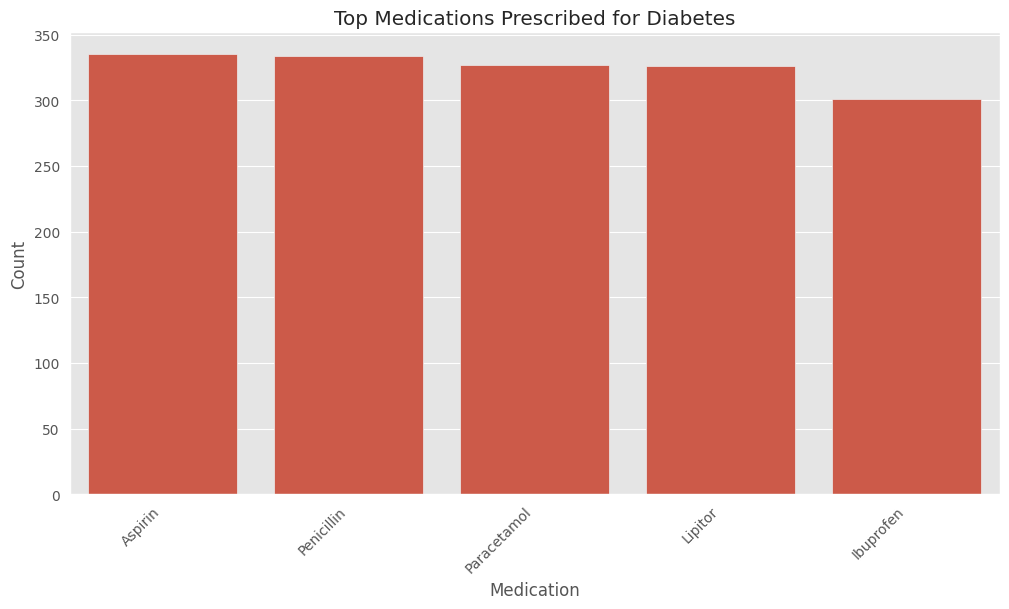

Test Results Trends:
    Medical Condition   Medication  Test Results  Count
0          Arthritis      Aspirin      Abnormal    108
1          Arthritis      Aspirin  Inconclusive    100
2          Arthritis      Aspirin        Normal    114
3          Arthritis    Ibuprofen      Abnormal    101
4          Arthritis    Ibuprofen  Inconclusive     96
..               ...          ...           ...    ...
85           Obesity  Paracetamol  Inconclusive     97
86           Obesity  Paracetamol        Normal    113
87           Obesity   Penicillin      Abnormal    107
88           Obesity   Penicillin  Inconclusive    103
89           Obesity   Penicillin        Normal    117

[90 rows x 4 columns]


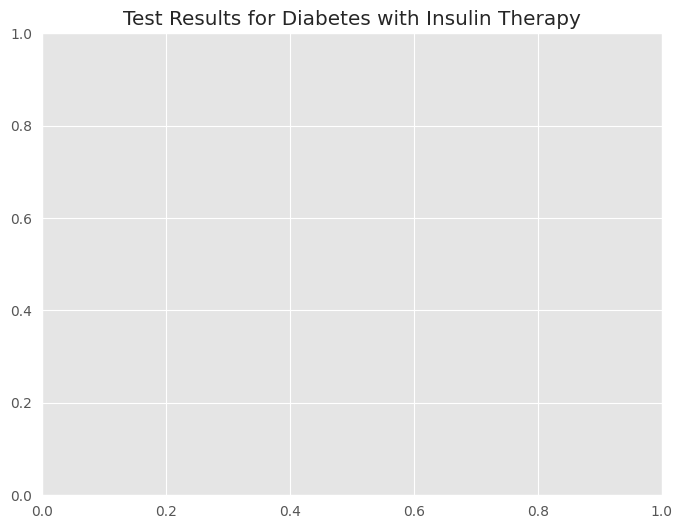

In [39]:
   # Identify most commonly prescribed medications for various conditions
medication_by_condition = df.groupby(['Medical Condition', 'Medication'])['Name'].count().reset_index()
medication_by_condition = medication_by_condition.rename(columns={'Name': 'Count'})
print("Medication Usage by Condition:\n", medication_by_condition)

   # Visualize the top medications for a specific condition (example)
condition_name = 'Diabetes'  # Replace with the desired condition
filtered_data = medication_by_condition[medication_by_condition['Medical Condition'] == condition_name]
filtered_data = filtered_data.sort_values(by=['Count'], ascending=False).head(10)  # Top 10 medications
plt.figure(figsize=(12, 6))
sns.barplot(x='Medication', y='Count', data=filtered_data)
plt.title(f'Top Medications Prescribed for {condition_name}')
plt.xticks(rotation=45, ha='right')
plt.show()

   # You can create similar visualizations for other conditions.


# Examine patterns in test results across different conditions and medications
test_results_by_condition_medication = df.groupby(['Medical Condition', 'Medication', 'Test Results'])['Name'].count().reset_index()
test_results_by_condition_medication = test_results_by_condition_medication.rename(columns={'Name': 'Count'})
print("Test Results Trends:\n", test_results_by_condition_medication)

# Visualize test results for a specific condition and medication (example)
condition_name = 'Diabetes'  # Replace with the desired condition
medication_name = 'Insulin Therapy'  # Replace with the desired medication (from 'Medication' column)
filtered_data = test_results_by_condition_medication[
    (test_results_by_condition_medication['Medical Condition'] == condition_name) &
    (test_results_by_condition_medication['Medication'] == medication_name)
]
plt.figure(figsize=(8, 6))
sns.barplot(x='Test Results', y='Count', data=filtered_data)
plt.title(f'Test Results for {condition_name} with {medication_name}')
plt.show()

   # You can create similar visualizations for other conditions and treatments.

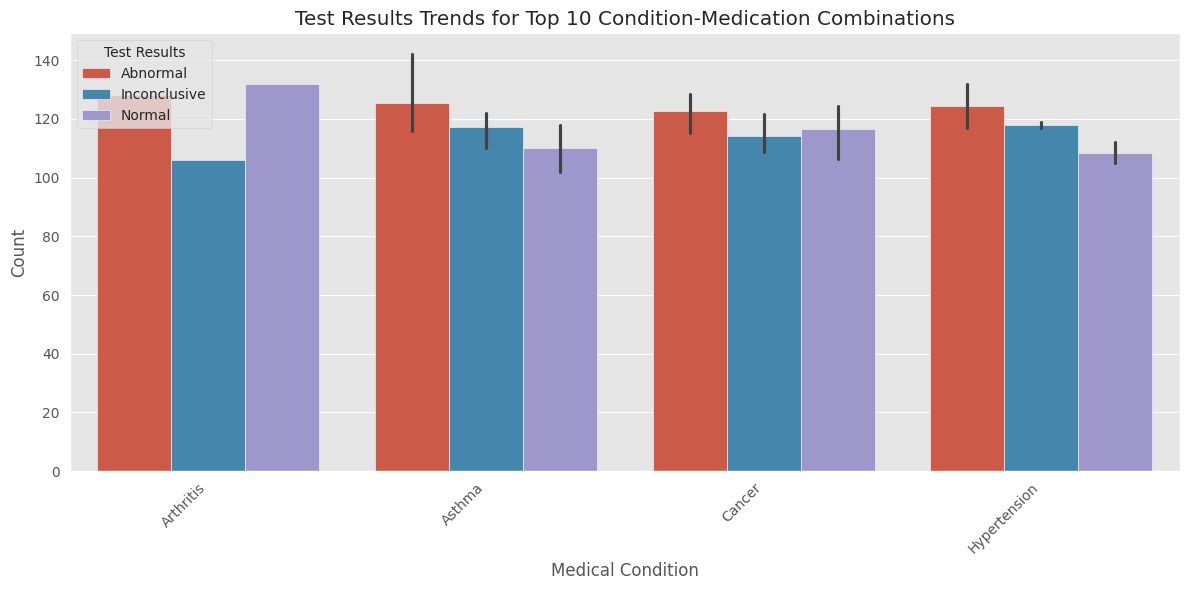

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your previous code for grouping and aggregating data) ...

# Select top N medical condition and medication combinations based on count
N = 10  # Number of top combinations to select
top_combinations = test_results_by_condition_medication.groupby(['Medical Condition', 'Medication'])['Count'].sum().nlargest(N).index

# Filter data to include only top combinations
filtered_data = test_results_by_condition_medication[
    test_results_by_condition_medication[['Medical Condition', 'Medication']].apply(tuple, axis=1).isin(top_combinations)
]

# Visualize the data for top combinations
plt.figure(figsize=(12, 6))
sns.barplot(x='Medical Condition', y='Count', hue='Test Results', data=filtered_data)
plt.title(f'Test Results Trends for Top {N} Condition-Medication Combinations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your previous code) ...

# Examine patterns in test results across different conditions and medications
test_results_by_condition_medication = df.groupby(['Medical Condition', 'Medication', 'Test Results'])['Name'].count().reset_index()
test_results_by_condition_medication = test_results_by_condition_medication.rename(columns={'Name': 'Count'})
print("Test Results Trends:\n", test_results_by_condition_medication)

# ... (Your previous code) ...

medication_name = "Insulin"  # Replace with the actual medication name found in your data

filtered_data = test_results_by_condition_medication[
    (test_results_by_condition_medication['Medical Condition'] == condition_name) &
    (test_results_by_condition_medication['Medication'] == medication_name)
]

# ... (Rest of your code) ...

# Check if filtered_data is empty
if filtered_data.empty:
    print(f"WARNING: No data found for {condition_name} with {medication_name}. Plot will be blank.")
else:
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Test Results', y='Count', data=filtered_data)
    plt.title(f'Test Results for {condition_name} with {medication_name}')
    plt.show()

# ... (Rest of your code) ...

Test Results Trends:
    Medical Condition   Medication  Test Results  Count
0          Arthritis      Aspirin      Abnormal    108
1          Arthritis      Aspirin  Inconclusive    100
2          Arthritis      Aspirin        Normal    114
3          Arthritis    Ibuprofen      Abnormal    101
4          Arthritis    Ibuprofen  Inconclusive     96
..               ...          ...           ...    ...
85           Obesity  Paracetamol  Inconclusive     97
86           Obesity  Paracetamol        Normal    113
87           Obesity   Penicillin      Abnormal    107
88           Obesity   Penicillin  Inconclusive    103
89           Obesity   Penicillin        Normal    117

[90 rows x 4 columns]


Medication Usage and Test Results

Medication Usage by Condition

Consistent Medication Usage: The distribution of medications across different conditions is relatively similar. This suggests that common medications are used to treat various conditions.

Penicillin and Aspirin: These medications seem to be the most commonly prescribed, possibly for their broad-spectrum antibacterial and anti-inflammatory properties.

Test Results Trends
Abnormal Test Results: A significant portion of test results, especially for conditions like arthritis and hypertension, are abnormal. This highlights the need for further investigation and potential treatment adjustments.
Inconclusive Results: A considerable number of test results are inconclusive. This could be due to various factors, such as insufficient sample size, technical limitations, or the complexity of the disease.

Potential Insights and Recommendations:

Medication Effectiveness and Side Effects:

Analyze the correlation between medication usage and patient outcomes.
Monitor for adverse drug reactions and adjust treatment plans as needed.

Explore the potential benefits of combination therapies or personalized medicine approaches.

Test Result Interpretation:

Develop standardized guidelines for interpreting test results to ensure consistency.
Implement quality control measures to minimize errors in laboratory testing.
Consider the potential impact of factors like patient demographics, lifestyle, and comorbidities on test results.

Patient Monitoring and Follow-up:

Establish regular follow-up appointments to monitor patient progress and adjust treatment plans as needed.
Utilize telemedicine and remote monitoring technologies to improve patient care and reduce healthcare costs.
By analyzing medication usage patterns and test results, healthcare providers can optimize treatment plans, improve patient outcomes, and reduce healthcare costs.

Would you like to delve deeper into a specific aspect of the analysis, such as the impact of medication on patient outcomes or the factors influencing test result variability?

# HOSPITAL SPESIFIC INSIGHT
1. Hospital Performance
2. Room Utilization

Room Utilization:
      Room Number  count
0            358     44
1            230     40
2            257     38
3            469     37
4            195     36
..           ...    ...
395          160     14
396          306     14
397          321     14
398          373     14
399          352     10

[400 rows x 2 columns]
Hospital Performance:
                          Hospital  Billing Amount  Length of Stay (days)
0                      Abbott Inc     32114.20515                   30.0
1                      Abbott LLC     10497.36250                   13.5
2                      Abbott PLC     31786.83098                    4.0
3         Abbott, Curry and Moore     11869.28365                   14.0
4                   Abbott-Jordan     25326.80555                   28.0
...                           ...             ...                    ...
8634  Zimmerman, Salinas and Hill     44147.79355                   27.0
8635                   Zuniga Ltd     25298.39650             

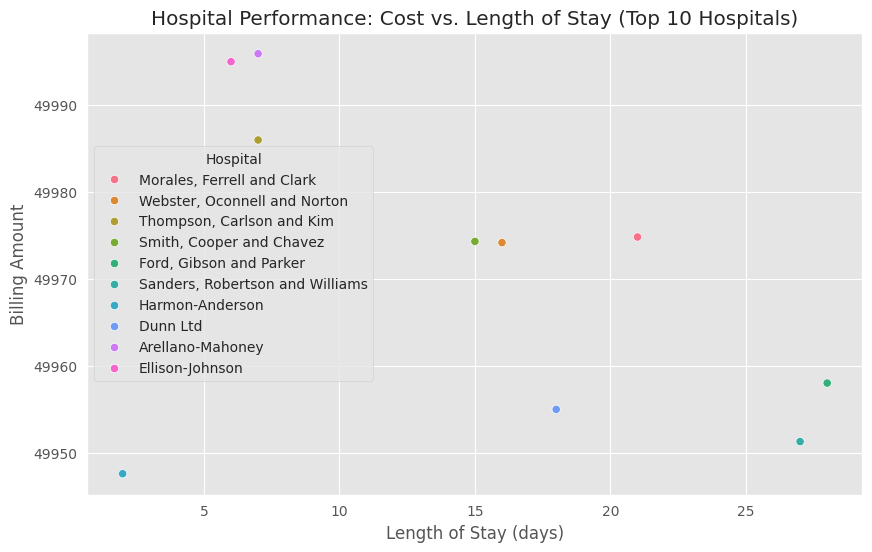

In [42]:
# investigate room utilization
room_utilization = df['Room Number'].value_counts().reset_index()
print("Room Utilization:\n", room_utilization)

# Compare hospitals based on average patient costs, length of stay, and outcomes
hospital_performance = df.groupby('Hospital')[['Billing Amount', 'Length of Stay (days)']].mean().reset_index()
print("Hospital Performance:\n", hospital_performance)

# You can further analyze outcomes by including relevant outcome variables (e.g., discharge status)
# and using appropriate statistical tests or visualizations.

# Visualize hospital performance (example: average cost vs. length of stay)
plt.figure(figsize=(10, 6))

# Select top 10 hospitals by Billing Amount for visualization
top_hospitals = hospital_performance.sort_values(by=['Billing Amount'], ascending=False).head(10)['Hospital'].tolist()
filtered_df = df[df['Hospital'].isin(top_hospitals)]

sns.scatterplot(x='Length of Stay (days)', y='Billing Amount', hue='Hospital', data=filtered_df)  # Use filtered_df here
plt.title('Hospital Performance: Cost vs. Length of Stay (Top 10 Hospitals)')
plt.show()

# You can create other visualizations to compare hospitals based on different metrics.

**Room Utilization and Hospital Performance**

**Room Utilization Analysis**

**Key Insights:**

High-Utilization Rooms: Rooms 358 and 230 have the highest utilization, indicating high demand or potential capacity constraints.
Low-Utilization Rooms: Rooms 395, 396, 397, 398, and 352 have the lowest utilization, suggesting potential underutilization or strategic allocation issues.

Potential Recommendations:

Capacity Planning: Analyze the demand patterns for high-utilization rooms to identify potential capacity expansion needs.

Room Allocation Strategies: Implement strategies to optimize room allocation and minimize idle time, especially for low-utilization rooms.

Patient Flow Optimization: Improve patient flow processes, such as discharge planning and bed management, to reduce room turnover time.

Data-Driven Scheduling: Utilize data analytics to predict patient demand and optimize staffing levels.

Hospital Performance Analysis
Key Insights:

Variable Billing Amounts: The billing amounts vary significantly across different hospitals, indicating differences in treatment complexity, length of stay, and pricing strategies.

Diverse Length of Stay: The length of stay varies widely, suggesting differences in patient acuity, treatment protocols, and discharge planning.

Potential Recommendations:

Performance Benchmarking: Compare the performance of different hospitals based on key metrics like average length of stay, billing amount, and patient satisfaction.

Cost-Effectiveness Analysis: Identify opportunities to reduce costs while maintaining quality of care.

Clinical Pathway Optimization: Develop standardized clinical pathways to streamline patient care and reduce unnecessary costs.

Data-Driven Decision Making: Utilize data analytics to identify trends, anomalies, and opportunities for improvement.

Additional Considerations:

Patient Mix: Analyze the distribution of patient types (e.g., acute, chronic, elective) across different hospitals.

Staffing Levels: Assess the impact of staffing levels on patient outcomes and operational efficiency.

Technology Adoption: Explore the potential of technology to improve efficiency and reduce costs.

By analyzing these factors, healthcare organizations can optimize resource allocation, improve patient outcomes, and enhance overall operational efficiency.